Learning outcome:

To learn how to compare 2 groups of bar figures inside one same bar graph

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:

# %load get_df.
#This reads in the CSV file for a given year
def get_df(yr):
    return pd.read_csv("Environmental_Data_Deep_Moor_{}.csv".format(yr))


In [24]:

# %load get_seasons.py
#This function returns a list of DataFrames what correspond to the seasons of the year.
def get_seasons(yr):
    df = get_df(yr)
    res= [df[df['date'].between('{}_03_20'.format(yr),'{}_06_19'.format(yr))],
            df[df['date'].between('{}_06_20'.format(yr),'{}_09_21'.format(yr))],
            df[df['date'].between('{}_09_22'.format(yr),'{}_12_20'.format(yr))],
            df[~df['date'].between('{}_03_20'.format(yr),'{}_12_20'.format(yr))]]
    return res


In [25]:
seasons = ["Spring","Summer","Fall","Winter"]
heights = [season['Air_Temp'].mean() for season in get_seasons('2013')] #each element of heights represents the average air temperature for each season


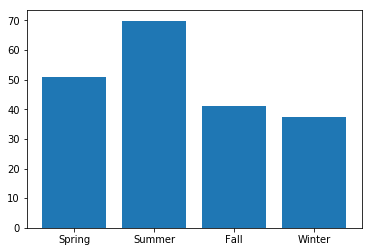

In [26]:
#pass a list of seasons as the x parameter and a list of the DataFrames as the heights variable (i.e. y values)
plt.bar(seasons,heights)
plt.show()

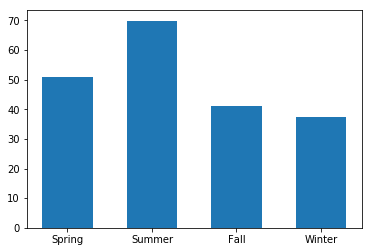

In [27]:
plt.bar(seasons,heights, 0.6)# give more width or white space between a bar and another bar by a value from 0 to 1, e.g. 0.6 
plt.show()

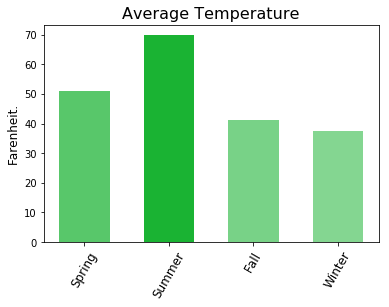

In [28]:

#here we use RGB(A) tuple color format to adjust the alpha level or the opacity as the opacity is controlled by the alpha level value (with a range from 0 to 1)
#set the highest bar to be fully opaque and each of other bars to have an opacity that is calculated in proportion to its height 
alphas = [height/max(heights) for height in heights] # alpha value = height of the bar in proportion to whichever one is tallest
colors = [(0.1, 0.7, 0.2, a) for a in alphas]
plt.bar(seasons,heights, .6, color = colors) #plug the colors array to the bar function to define how the color of each bar should look like
plt.title('Average Temperature',fontsize=16)
plt.ylabel('Farenheit.',fontsize=12)
plt.xticks(rotation=60,fontsize=12)
plt.show()


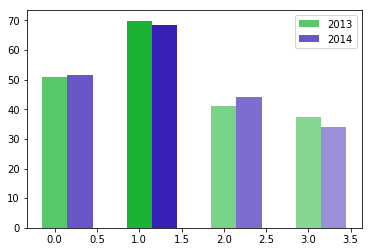

In [29]:

#compare average temperatures from one year to another year with 2 subplots inside one same bar chart
heights14 = [season['Air_Temp'].mean() for season in get_seasons('2014')]
alphas14 = [height/max(heights) for height in heights14]
colors14 = [(.2,.1,.7,a) for a in alphas14]#an easy trick for varying colors is to rotate the values of R, G and B values so that they are in different order,compared to the code "colors = [(.1,.7,.2,a) for a in alphas]" before
index = np.arange(4)
fig,ax = plt.subplots()
rects1 = ax.bar(index, heights, .3, color=colors, label='2013')
rects1 = ax.bar(index+.3, heights14, .3, color=colors14, label='2014')
ax.legend()
plt.show()